In [79]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
s27 = pd.read_parquet("20190927.parquet")

In [15]:
s27.shape

(73660, 60)

In [16]:
s27.head()

,0_3um,0_5um,1_0um,2_5um,5_0um,10_0um,pm1_0,pm10_0,created,pm1_0_atm,pm2_5_atm,pm10_0_atm,uptime,rssi,temperature,humidity,pm2_5_cf_1,a_h,device_loc_typ,high_reading_flag,hidden,sensor_id,sensor_name,lat,lon,parent_id,is_owner,city,county,zipcode,created_at,year,month,day,hour,minute,wban_number,call_sign,call_sign2,interval,call_sign3,zulu_time,report_modifier,wind_data,wind_direction,wind_speed,gusts,gust_speed,variable_winds,variable_wind_info,sys_maint_reqd,epa_pm25_unit,epa_pm25_value,raw_concentration,aqi,category,site_name,agency_name,full_aqs_code,intl_aqs_code
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,935.56,270.69,45.63,7.76,2.35,0.00,4.57,8.82,201909270000,4.34,7.07,9.19,913.0,-74.0,83.0,46.0,7.07,None,outside,nan,false,16939,#SAFQ11,37.72244,-122.439302,nan,0,San Francisco,San Francisco County,94112,2019/09/27T00:00,2019,09,27,00,00,23234,KSFO,SFO,5-MIN,KSFO,270800Z,,1.0,250,6.0,0.0,NaN,0.0,,0.0,UG/M3,5.8,4.0,24,1,San Francisco,San Francisco Bay Area AQMD,60750005,840060750005
1,842.38,244.69,51.99,9.53,3.35,0.00,3.78,8.69,201909270010,4.24,6.82,9.66,923.0,-71.0,82.0,47.0,6.82,None,outside,nan,false,16939,#SAFQ11,37.72244,-122.439302,nan,0,San Francisco,San Francisco County,94112,2019/09/27T00:10,2019,09,27,00,10,23234,KSFO,SFO,5-MIN,KSFO,270810Z,,1.0,240,8.0,0.0,NaN,0.0,,0.0,UG/M3,5.8,4.0,24,1,San Francisco,San Francisco Bay Area AQMD,60750005,840060750005
2,832.65,247.20,41.00,6.56,2.14,1.10,3.93,8.15,201909270020,4.07,7.60,9.65,932.0,-72.0,81.0,47.0,7.60,None,outside,nan,false,16939,#SAFQ11,37.72244,-122.439302,nan,0,San Francisco,San Francisco County,94112,2019/09/27T00:20,2019,09,27,00,20,23234,KSFO,SFO,5-MIN,KSFO,270820Z,,1.0,250,6.0,0.0,NaN,0.0,,0.0,UG/M3,5.8,4.0,24,1,San Francisco,San Francisco Bay Area AQMD,60750005,840060750005
3,916.69,260.89,48.72,7.73,2.65,0.00,3.97,8.58,201909270030,3.97,6.94,8.58,942.0,-75.0,81.0,48.0,6.94,None,outside,nan,false,16939,#SAFQ11,37.72244,-122.439302,nan,0,San Francisco,San Francisco County,94112,2019/09/27T00:30,2019,09,27,00,30,23234,KSFO,SFO,5-MIN,KSFO,270830Z,,1.0,250,7.0,0.0,NaN,0.0,,0.0,UG/M3,5.8,4.0,24,1,San Francisco,San Francisco Bay Area AQMD,60750005,840060750005
4,924.00,269.25,51.26,6.03,3.65,1.59,4.68,9.53,201909270040,4.68,6.85,9.53,952.0,-73.0,80.0,49.0,6.85,None,outside,nan,false,16939,#SAFQ11,37.72244,-122.439302,nan,0,San Francisco,San Francisco County,94112,2019/09/27T00:40,2019,09,27,00,40,23234,KSFO,SFO,5-MIN,KSFO,270840Z,,1.0,250,7.0,0.0,NaN,0.0,,0.0,UG/M3,5.8,4.0,24,1,San Francisco,San Francisco Bay Area AQMD,60750005,840060750005


In [17]:
s27.dtypes

0_3um                 float64
0_5um                 float64
1_0um                 float64
2_5um                 float64
5_0um                 float64
10_0um                float64
pm1_0                 float64
pm10_0                float64
created                 int64
pm1_0_atm             float64
pm2_5_atm             float64
pm10_0_atm            float64
uptime                float64
rssi                  float64
temperature           float64
humidity              float64
pm2_5_cf_1            float64
a_h                    object
device_loc_typ         object
high_reading_flag      object
hidden                 object
sensor_id              object
sensor_name            object
lat                   float64
lon                   float64
parent_id              object
is_owner               object
city                   object
county                 object
zipcode                object
created_at             object
year                   object
month                  object
day       

In [ ]:
s27.

In [17]:
s27.groupby(['device_loc_typ']).agg({'sensor_id':'count'})

,sensor_id
device_loc_typ,
inside,34150
outside,50016


In [19]:
s27[s27.device_loc_typ == "outside"]['high_reading_flag'].describe()

count     50016
unique        2
top         nan
freq      38128
Name: high_reading_flag, dtype: object

In [3]:
## hm
out_df = s27[s27.device_loc_typ == "outside"]

num_cols = ['0_3um', '0_5um', '1_0um', '2_5um', '5_0um', '10_0um', 'pm1_0',
            'pm10_0', 'pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm', 'pm2_5_cf_1', 'humidity',
            'epa_pm25_value']
out_df.groupby(['high_reading_flag']).agg({c:'mean' for c in num_cols})

,0_3um,0_5um,1_0um,2_5um,5_0um,10_0um,pm1_0,pm10_0,pm1_0_atm,pm2_5_atm,pm10_0_atm,pm2_5_cf_1,humidity,epa_pm25_value
high_reading_flag,,,,,,,,,,,,,,
1.0,3351.241272,854.945982,41.516759,3.206442,1.063179,0.366265,345.061544,347.857859,515.638516,517.322132,518.262426,346.678954,60.286079,5.178449
nan,733.721276,211.624425,33.352578,4.032691,1.340495,0.500333,3.232498,6.116706,3.214228,5.082761,6.157138,5.100338,62.324511,5.144524


In [4]:
num_cols = ['0_3um', '0_5um', '1_0um', '2_5um', '5_0um', '10_0um', 'pm1_0',
            'pm10_0', 'pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm', 'pm2_5_cf_1', 'humidity',
            'epa_pm25_value']
out_df.groupby(['a_h']).agg({c:'mean' for c in num_cols})

,0_3um,0_5um,1_0um,2_5um,5_0um,10_0um,pm1_0,pm10_0,pm1_0_atm,pm2_5_atm,pm10_0_atm,pm2_5_cf_1,humidity,epa_pm25_value
a_h,,,,,,,,,,,,,,
true,15715.920764,2509.790972,247.058056,11.541875,2.261389,0.805972,36.159097,58.531806,53.304861,64.168889,66.104583,48.469653,72.555556,3.495833


In [38]:
(out_df.a_h == "true").mean()

0.005758157389635317

In [5]:
(out_df.high_reading_flag == "1.0").mean()

0.23768394113883556

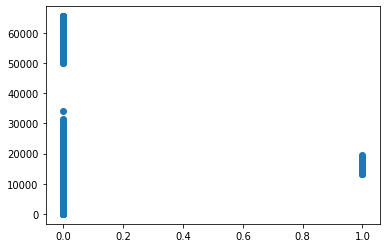

In [14]:
plt.scatter((out_df.a_h == "true"), out_df['0_3um'])

In [15]:
out_df['0_3um'].describe()

count    24567.000000
mean      1358.721166
std       4962.852084
min          0.000000
25%        346.155000
50%        651.580000
75%       1056.095000
max      65535.000000
Name: 0_3um, dtype: float64

**so, 23 percent of all values have 'high reading flag'**

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# removing any calculated purple air columns
# 0_5 also removed due to high collinearity
cols_of_interest = ['0_3um', '1_0um', '2_5um', '5_0um', '10_0um', 'temperature', 'humidity','epa_pm25_value']

X = pca.fit_transform(out_df[cols_of_interest].fillna(out_df[cols_of_interest].mean()))


Text(0.5, 1.0, 'PCA of numeric columns')

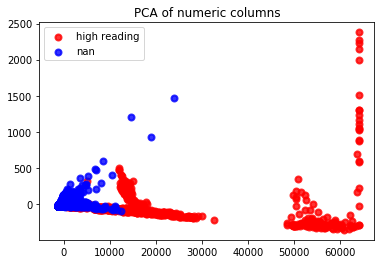

In [9]:
lw = 2

plt.scatter(X[out_df.high_reading_flag == "1.0", 0], X[out_df.high_reading_flag == "1.0", 1], 
            color="red", alpha=.8, lw=lw,label="high reading")

plt.scatter(X[out_df.high_reading_flag != "1.0", 0], X[out_df.high_reading_flag != "1.0", 1], 
           color="blue", alpha=.8, lw=lw,label="nan")

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of numeric columns')

## actually moving on to anomaly detection methods -- picking a couple variables for univariate testing

/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


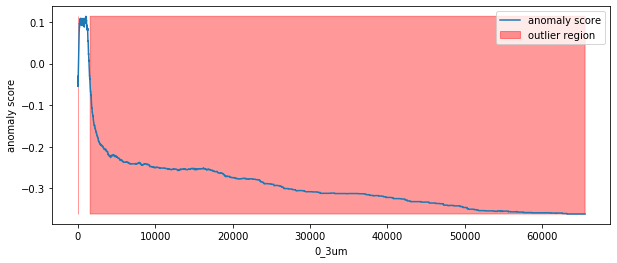

In [5]:
from sklearn.ensemble import IsolationForest

df_1 = out_df[out_df['0_3um'].notna()]

isolation_forest = IsolationForest(n_estimators=100, contamination = 0.05)
isolation_forest.fit(df_1['0_3um'].values.reshape(-1, 1))

xx = np.linspace(df_1['0_3um'].min(), df_1['0_3um'].max(), len(df_1)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)

outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('0_3um')
plt.show();

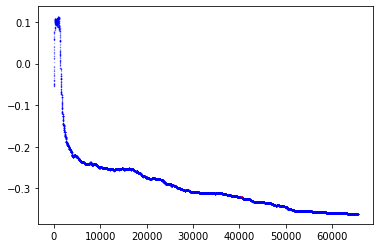

In [6]:
# plot scatter y anomaly score, x reading, vertical line for outlier region, 
#color dots for 'a_h'


plt.scatter(xx[df_1.a_h == "true"], anomaly_score[df_1.a_h == "true"],
            color = "red", s = 0.2)
plt.scatter(xx[df_1.a_h != "true"], anomaly_score[df_1.a_h != "true"],
            color = "blue", s = 0.1, alpha = 0.5)

doesn't seem like outlier score (for this particular metric) is tied to 'high reading'?

## multivariate?

In [7]:
from sklearn import preprocessing


cols_of_interest = ['0_3um', '0_5um', '1_0um', '2_5um', '5_0um', '10_0um', 'temperature', 'humidity','epa_pm25_value']

df_2 = out_df[cols_of_interest].fillna(out_df[cols_of_interest].mean())




inliers = black, outliers = red


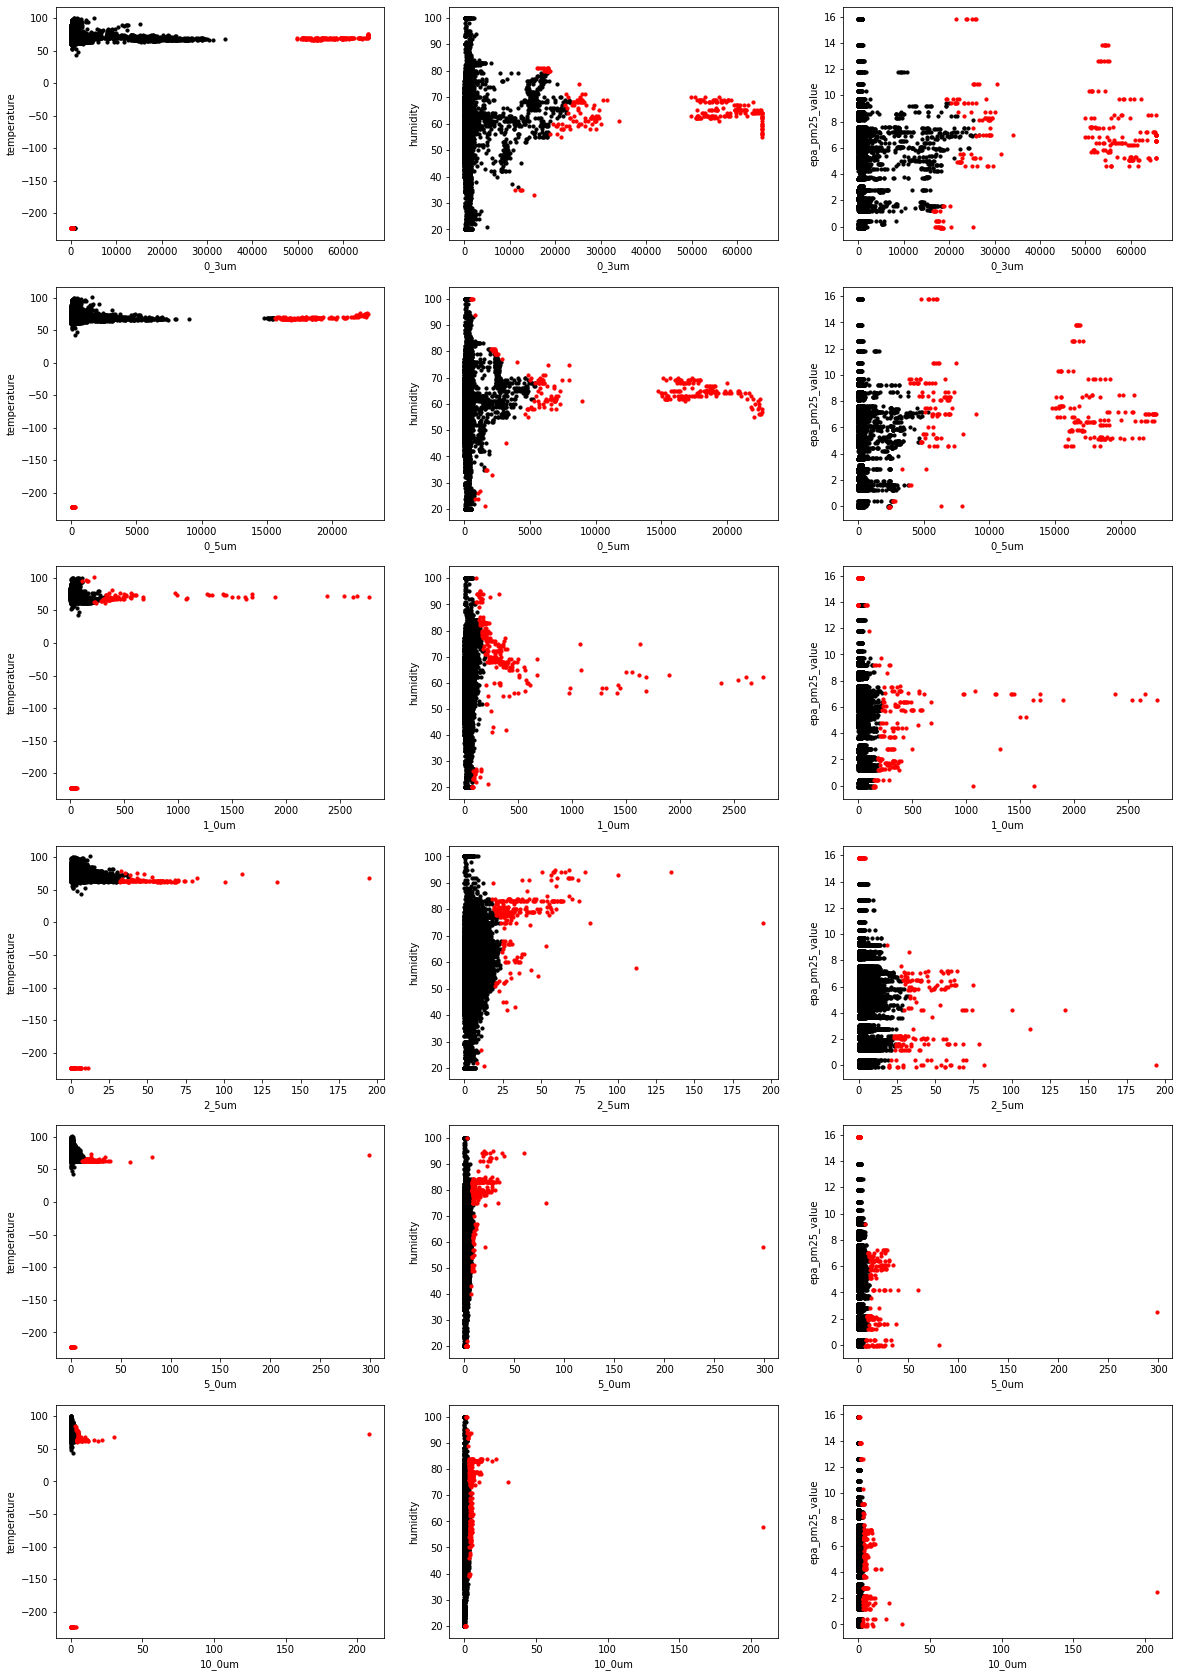

In [10]:
fig, ax = plt.subplots(nrows = 6, ncols = 3, figsize = (20,30))

outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

rc_fromi = lambda x: (x%6, x//6,)

print("inliers = black, outliers = red")

i = 0
for weather in ['temperature', 'humidity','epa_pm25_value']:
    for measure in ['0_3um','0_5um', '1_0um', '2_5um', '5_0um', '10_0um']:
        
        
        scaler = preprocessing.MinMaxScaler()
        X = scaler.fit_transform(df_2[[measure, weather]])
        
        clf  = IsolationForest(n_estimators=100, contamination = outliers_fraction)
        clf .fit(X)
        
        scores_pred = clf.decision_function(X) * -1
        
        
        y_pred = clf.predict(X)
        n_inliers = np.sum(y_pred == 1)
        n_outliers = np.sum(y_pred == -1)
        
        assert n_inliers > n_outliers # shit test

        inliers_measure = np.array(df_2[measure][y_pred == 1]).reshape(-1,1)
        inliers_weather = np.array(df_2[weather][y_pred == 1]).reshape(-1,1)

        outliers_measure = np.array(df_2[measure][y_pred == -1]).reshape(-1,1)
        outliers_weather = np.array(df_2[weather][y_pred == -1]).reshape(-1,1)
        
        threshold = np.percentile(scores_pred, 100 * outliers_fraction)
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # fill countours
        #ax[rc_fromi(i)].contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        #ax[rc_fromi(i)].contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
        # draw countour lines
        #ax[rc_fromi(i)].contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
        ax[rc_fromi(i)].scatter(inliers_measure, inliers_weather, c='black',s=10)
        ax[rc_fromi(i)].scatter(outliers_measure, outliers_weather, c='red',s=10)
        ax[rc_fromi(i)].set_xlabel(measure)
        ax[rc_fromi(i)].set_ylabel(weather)
        i +=1




inliers = black, outliers = red


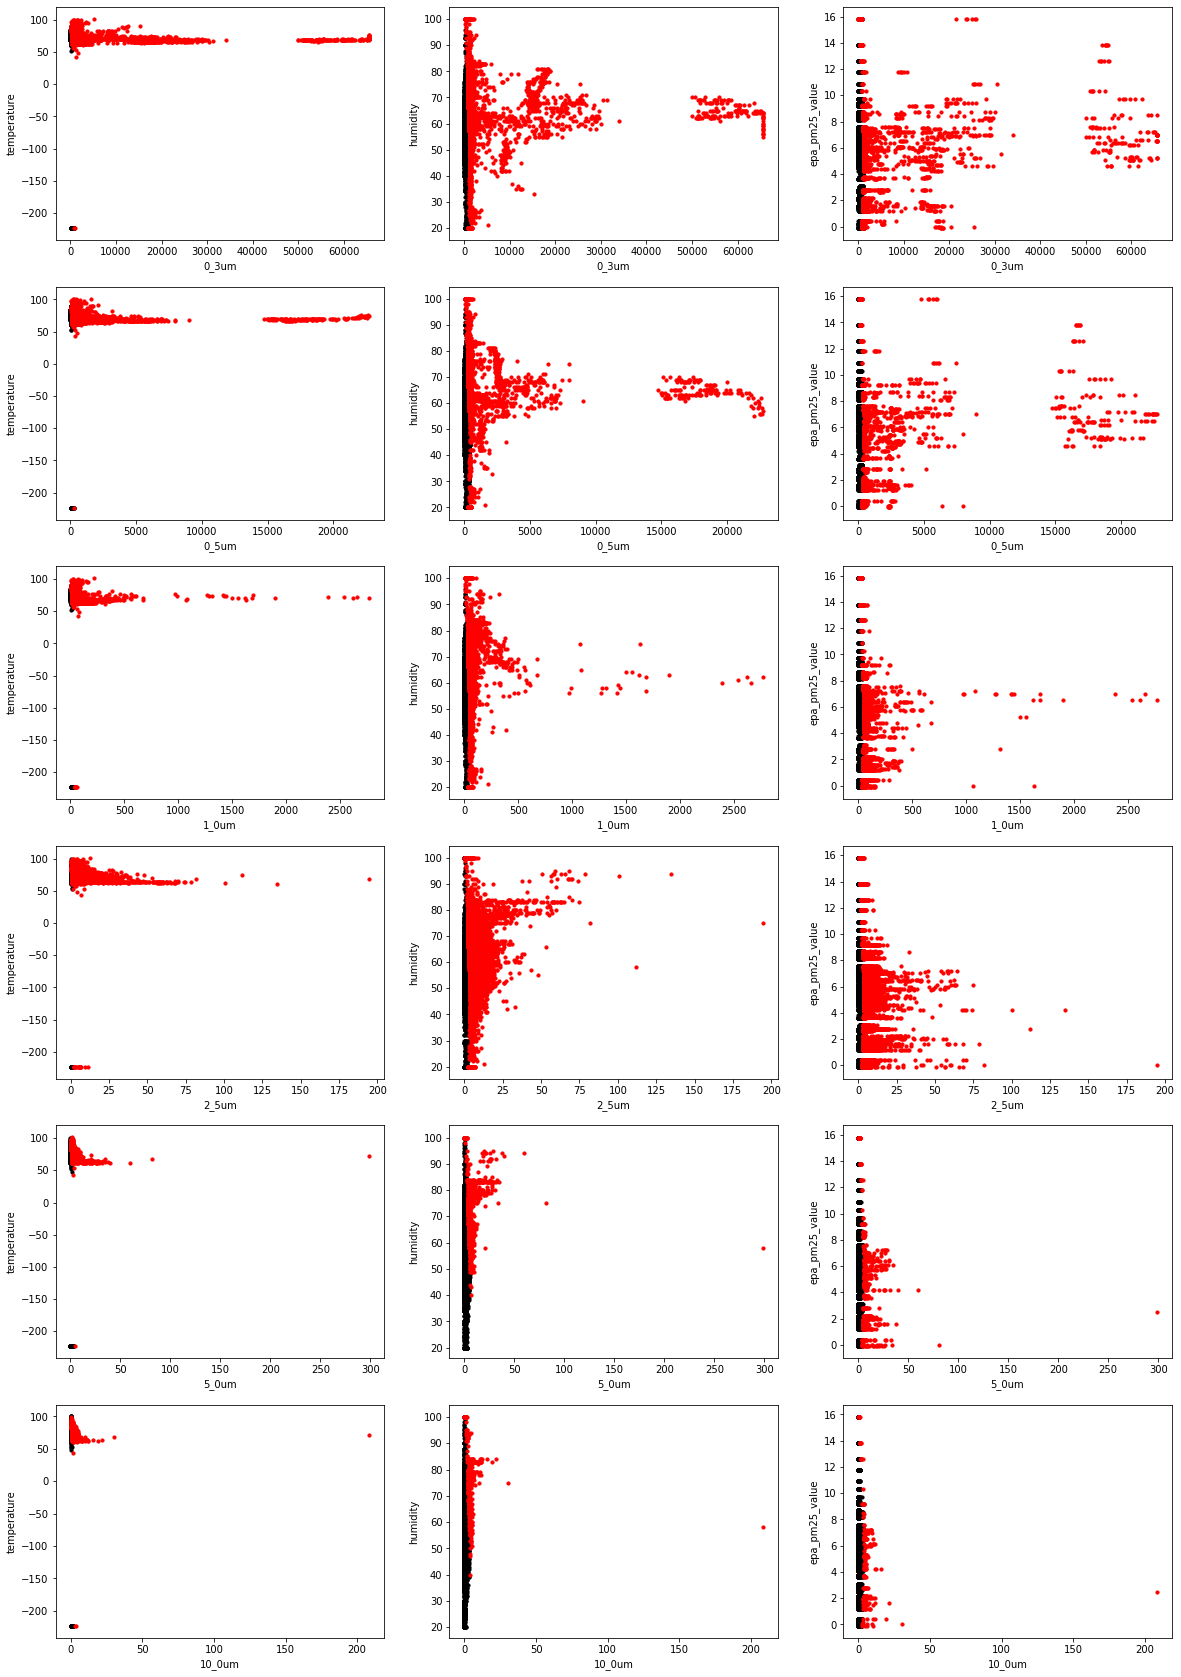

In [11]:
from sklearn.neighbors import LocalOutlierFactor

fig, ax = plt.subplots(nrows = 6, ncols = 3, figsize = (20,30))

outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

rc_fromi = lambda x: (x%6, x//6,)

print("inliers = black, outliers = red")

i = 0
for weather in ['temperature', 'humidity','epa_pm25_value']:
    for measure in ['0_3um','0_5um', '1_0um', '2_5um', '5_0um', '10_0um']:
        
        
        scaler = preprocessing.MinMaxScaler()
        X = scaler.fit_transform(df_2[[measure, weather]])
        
        lof = LocalOutlierFactor(n_neighbors=20, contamination = 0.1)
        lof .fit(X)
        
        #scores_pred = clf.decision_function(X) * -1
        
        
        y_pred = clf.predict(X)
        n_inliers = np.sum(y_pred == 1)
        n_outliers = np.sum(y_pred == -1)

        inliers_measure = np.array(df_2[measure][y_pred == 1]).reshape(-1,1)
        inliers_weather = np.array(df_2[weather][y_pred == 1]).reshape(-1,1)

        outliers_measure = np.array(df_2[measure][y_pred == -1]).reshape(-1,1)
        outliers_weather = np.array(df_2[weather][y_pred == -1]).reshape(-1,1)
        
#         threshold = np.percentile(scores_pred, 100 * outliers_fraction)
#         Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#         Z = Z.reshape(xx.shape)
        
        # fill countours
        #ax[rc_fromi(i)].contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        #ax[rc_fromi(i)].contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
        # draw countour lines
        #ax[rc_fromi(i)].contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
        ax[rc_fromi(i)].scatter(inliers_measure, inliers_weather, c='black',s=10)
        ax[rc_fromi(i)].scatter(outliers_measure, outliers_weather, c='red',s=10)
        ax[rc_fromi(i)].set_xlabel(measure)
        ax[rc_fromi(i)].set_ylabel(weather)
        i +=1




### nearest neighbors?
https://stackoverflow.com/questions/3104781/inverse-distance-weighted-idw-interpolation-with-python
https://en.wikipedia.org/wiki/Inverse_distance_weighting
https://pro.arcgis.com/en/pro-app/help/analysis/geostatistical-analyst/how-radial-basis-functions-work.htm
http://www.bisolutions.us/A-Brief-Introduction-to-Spatial-Interpolation.php


In [12]:
out_df.columns

Index(['0_3um', '0_5um', '1_0um', '2_5um', '5_0um', '10_0um', 'pm1_0',
       'pm10_0', 'created', 'pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm', 'uptime',
       'rssi', 'temperature', 'humidity', 'pm2_5_cf_1', 'a_h',
       'device_loc_typ', 'high_reading_flag', 'hidden', 'sensor_id',
       'sensor_name', 'lat', 'lon', 'parent_id', 'is_owner', 'city', 'county',
       'zipcode', 'created_at', 'year', 'month', 'day', 'hour', 'minute',
       'wban_number', 'call_sign', 'call_sign2', 'interval', 'call_sign3',
       'zulu_time', 'report_modifier', 'wind_data', 'wind_direction',
       'wind_speed', 'gusts', 'gust_speed', 'variable_winds',
       'variable_wind_info', 'sys_maint_reqd', 'epa_pm25_unit',
       'epa_pm25_value', 'raw_concentration', 'aqi', 'category', 'site_name',
       'agency_name', 'full_aqs_code', 'intl_aqs_code'],
      dtype='object')

In [27]:
from geopy.distance import distance
from itertools import combinations

In [26]:
def dist_from_x(xlat, xlon, ylat, ylon):
    return distance((xlat, xlon), (ylat, ylon)).miles

In [65]:
sensor_locs = out_df[['sensor_id', 'lat', 'lon']].drop_duplicates(subset='sensor_id').set_index('sensor_id')

In [38]:
sensor_locs.loc['16939', 'lat']

37.72244

In [43]:
def dist_miles(point_a, point_b):
    
    return distance((point_a.lat, point_a.lon), (point_b.lat, point_b.lon)).miles

dist_matrix = pd.DataFrame()
for combo in combinations(sensor_locs.index, 2):
    
    miles = dist_miles(sensor_locs.loc[combo[0]], sensor_locs.loc[combo[1]])
    dist_matrix.loc[combo[0], combo[1]] = dist_matrix.loc[combo[1], combo[0]] = miles

In [46]:
dist_matrix.head()

,16919,16939,16931,20747,5216,4101,22489,21435,28669,19335,20709,21269,23965,22069,19693,26065,15467,4770,5141,22351,19299,19153,16177,14865,32593,38193,23061,35747,2574,20721,19599,22337,19529,21351,23957,22873,20175,20593,20179,26353,16935,6182,19155,19301,19411,20515,19671,19245,22423,11600,27231,22319,34269,18969,21443,18907,21227,35433,7316,4776,17939,3082,3296,22415,19997,18491,27135,3900,20131,20781,15113,18475,22357,13517,13997,22099,3666,11628,18287,22051,23071,11610,5776,23121,18439,20519,22079,22989,7198,21942,6014,19459,3998,16899,32551,18753,23083,21057,4506,11726,5642,22493,27359,4339,21251,14339,19159,17787,21235,31237,19275,4480,22311,23927,16905,15645,19039,4772,5236,5234,5220,5044,5032,5282,5270,5242,5296,5202,5192,5186,6924,20951,19727,16917,16943,16013,19711,3996,24223,19999,18903,2031,19287,36035,20501,4421,7810,18999,4372,14389,18735,19647,12326,20089,22463,4801,18281,22523,20785,20989,35809,17817,15769,30189,17927,19657,3909,21783,24263,21473,17805,19189,26311,1742,19173,5024,39267
16939,0.004945,NaN,0.003502,15.112968,16.918382,4.535810,10.496371,2.761124,4.653961,4.967715,2.001175,2.435702,13.541090,2.622870,14.563993,3.964901,15.169852,4.633761,18.151494,15.461388,11.440147,3.543269,13.597644,14.608443,0.545063,14.429356,13.285057,13.705495,14.881109,2.075025,13.117817,13.593178,12.979571,12.981930,2.980308,0.375713,4.709228,11.746100,0.928014,2.685934,0.005526,1.534012,13.123103,13.480400,4.546606,14.649135,4.308842,14.447604,13.381699,13.165612,2.745409,14.864629,14.414772,15.168493,2.963601,11.705156,1.159059,3.740111,12.276367,15.200789,2.876696,14.760354,19.583175,2.184599,1.965479,11.916226,12.863608,2.502630,3.651214,12.193775,18.320252,15.734954,2.533617,14.734161,13.970817,13.464236,3.575614,11.344633,13.849279,0.715813,13.657327,12.562995,1.843531,1.908572,15.402991,11.513707,14.576981,3.428944,13.846309,14.063071,5.559123,1.859418,0.862902,0.003218,17.433392,9.217979,0.335237,14.147118,14.002480,12.760862,9.956075,14.218976,12.793093,18.577225,17.275187,15.600310,5.236188,3.638452,13.209456,11.890548,13.376361,4.812183,3.207826,2.235636,2.624592,14.760248,13.147501,17.377307,10.722515,10.523732,12.223985,11.406045,11.029766,11.443376,10.840218,18.684173,16.579389,18.229238,18.175270,18.382104,19.747254,14.404736,5.302141,0.004680,2.195460,1.378773,2.030354,5.285486,4.927725,14.151216,1.756245,1.134739,2.053232,3.074425,5.589281,15.261877,5.443813,5.003535,2.648886,14.071591,14.452649,10.534535,14.431334,2.059446,14.479133,12.916593,13.890088,1.631056,1.505808,1.843006,2.837467,15.114044,14.918812,13.304249,11.261547,3.788252,1.144992,15.620490,3.005766,12.166859,0.005708,2.223848,5.995079,4.481441,0.005686,13.549577,3.147228
16919,NaN,0.004945,0.008386,15.116460,16.918647,4.532660,10.499568,2.761498,4.650682,4.964432,2.000390,2.434223,13.543917,2.625182,14.566686,3.965641,15.171726,4.633954,18.151905,15.463801,11.444493,3.542854,13.601827,14.611394,0.549986,14.433564,13.287990,13.707881,14.882909,2.077158,13.121914,13.590294,12.977379,12.979722,2.978979,0.372341,4.708795,11.743171,0.929980,2.684819,0.010191,1.537148,13.125130,13.483980,4.548247,14.646499,4.308920,14.450567,13.385428,13.169494,2.743110,14.866634,14.412003,15.170711,2.966299,11.702082,1.158020,3.742879,12.278766,15.202695,2.874226,14.761863,19.584092,2.186927,1.961466,11.919576,12.867488,2.498958,3.651410,12.197270,18.323064,15.736760,2.534473,14.737285,13.974223,13.461872,3.576417,11.349083,13.851471,0.713309,13.660386,12.566232,1.845234,1.910109,15.400346,11.517002,14.579216,3.427607,13.844235,14.063724,5.557823,1.856997,0.860417,0.002546,17.436140,9.214329,0.333361,14.149303,14.004823,12.763702,9.953498,14.221090,12.795051,18.579948,17.278015,15.602151,5.232241,3.633527,13.207690,11.894331,13.379894,4.812139,3.209851,2.237872,2.627675,14.764323,13.145281,17.375177,10.726238,10.527074,12.227974,11.409787,11.033350,11.447274,10.844567,18.684614,16.579978,18.229545,18.175532,18.382608,19.748475,14.408810,5.298733,0.001955,2.2

In [73]:
dist_lookup = defaultdict(dict)

for combo in combinations(sensor_locs.index, 2):
    
    miles = dist_miles(sensor_locs.loc[combo[0]], sensor_locs.loc[combo[1]])
    dist_lookup[combo[0]][combo[1]] = miles
    dist_lookup[combo[1]][combo[0]] = miles

In [76]:
def idw(x, df, miles = 1):
    snapshot = df[(df.created == x.created)][['sensor_id', '0_3um']]
    
    snapshot = snapshot[snapshot.sensor_id != x.sensor_id]
    
    snapshot['weights'] = snapshot['sensor_id'].map(lambda y: dist_lookup[str(x.sensor_id)][str(y)])

    
    snapshot['weights'] = 1 / snapshot['weights']
    
    # make all weights sum to 1
    snapshot['weights'] = snapshot['weights'] / snapshot['weights'].sum()
    
    snapshot['weighted_amt'] = snapshot['weights'] * snapshot['0_3um']
    
    return snapshot['weighted_amt'].sum()


out_df['neighbors'] = out_df.apply(lambda x: idw(x, out_df), axis = 1)

In [102]:
## p = 2
def idw_2(x, df):
    snapshot = df[(df.created == x.created)][['sensor_id', '0_3um']]
    
    snapshot = snapshot[snapshot.sensor_id != x.sensor_id]
    
    snapshot['weights'] = snapshot['sensor_id'].map(lambda y: dist_lookup[str(x.sensor_id)][str(y)])

    
    snapshot['weights'] = 1 / (snapshot['weights']**2)
    
    # make all weights sum to 1
    snapshot['weights'] = snapshot['weights'] / snapshot['weights'].sum()
    
    snapshot['weighted_amt'] = snapshot['weights'] * snapshot['0_3um']
    
    return snapshot['weighted_amt'].sum()


out_df['neighbors_2'] = out_df.apply(lambda x: idw_2(x, out_df), axis = 1)

squaring p assigns higher value to closer neighbors

In [103]:
out_df[['0_3um', 'neighbors', 'neighbors_2']].describe()

,0_3um,neighbors,neighbors_2
count,24567.000000,25008.000000,25008.000000
mean,1358.721166,1287.608031,1214.023780
std,4962.852084,623.186349,1204.057856
min,0.000000,21.142019,0.061596
25%,346.155000,854.051560,611.457714
50%,651.580000,1204.608003,963.608331
75%,1056.095000,1568.180210,1351.209882
max,65535.000000,5228.873430,12635.433160


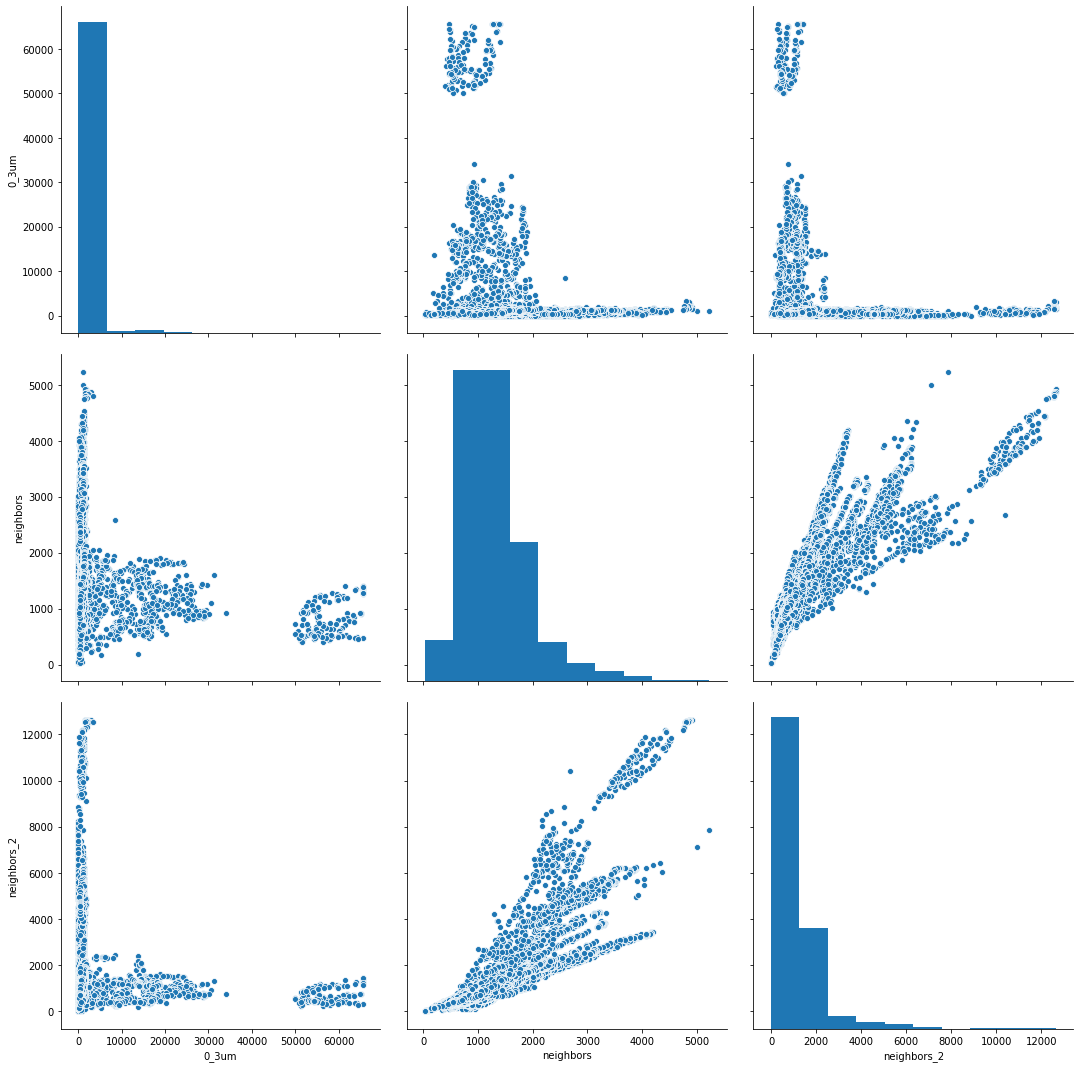

In [104]:
sns.pairplot(out_df[['0_3um', 'neighbors', 'neighbors_2']], height = 5)

In [106]:
df_3 = out_df[['0_3um', 'neighbors', 'neighbors_2']].fillna(out_df[['0_3um', 'neighbors', 'neighbors_2']].mean())


inliers = black, outliers = red


Text(0, 0.5, 'weighted avg of neighbors')

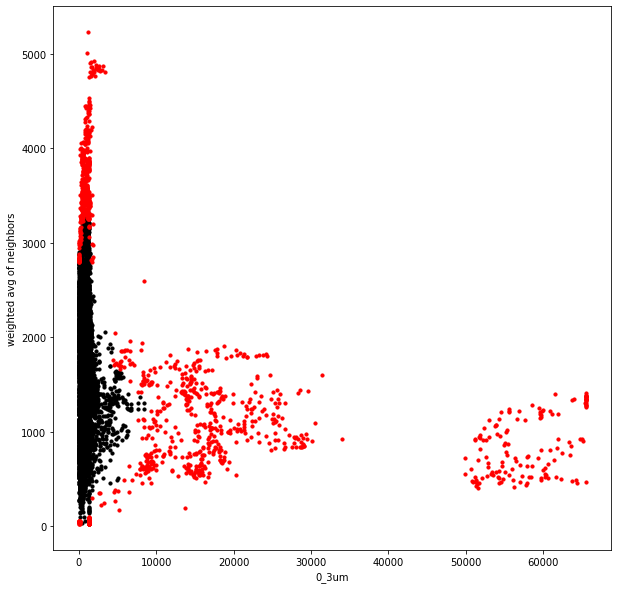

In [90]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))

outliers_fraction = 0.05
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

rc_fromi = lambda x: (x%6, x//6,)

print("inliers = black, outliers = red")

i = 0

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(df_3[['0_3um', 'neighbors']])

clf  = IsolationForest(n_estimators=100, contamination = outliers_fraction)
clf.fit(X)

scores_pred = clf.decision_function(X) * -1


y_pred = clf.predict(X)
n_inliers = np.sum(y_pred == 1)
n_outliers = np.sum(y_pred == -1)

assert n_inliers > n_outliers # shit test

inliers_measure = np.array(df_3['0_3um'][y_pred == 1]).reshape(-1,1)
inliers_neighbors = np.array(df_3['neighbors'][y_pred == 1]).reshape(-1,1)

outliers_measure = np.array(df_3['0_3um'][y_pred == -1]).reshape(-1,1)
outliers_neighbors = np.array(df_3['neighbors'][y_pred == -1]).reshape(-1,1)

threshold = np.percentile(scores_pred, 100 * outliers_fraction)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# fill countours
#ax[rc_fromi(i)].contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
#ax[rc_fromi(i)].contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

# draw countour lines
#ax[rc_fromi(i)].contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

ax.scatter(inliers_measure, inliers_neighbors, c='black',s=10)
ax.scatter(outliers_measure, outliers_neighbors, c='red',s=10)
ax.set_xlabel('0_3um')
ax.set_ylabel('weighted avg of neighbors')





(-499.3124856630824,
 10485.542485663082,
 -232.95906695734035,
 5488.962619372822)

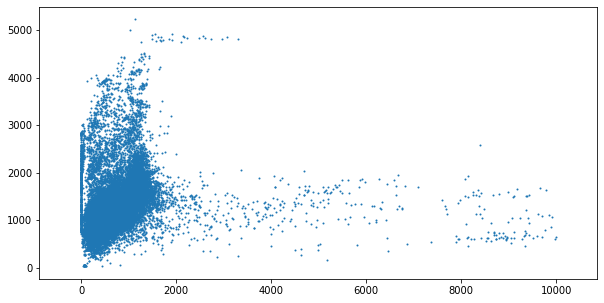

In [101]:
df4 = out_df[out_df['0_3um'] < 10000]
f, a = plt.subplots(figsize=(10,5))
a.scatter(x = df4['0_3um'], y = df4['neighbors'], s = 1)
a.axis('equal')

inliers = black, outliers = red


Text(0, 0.5, 'weighted avg of neighbors (p =2)')

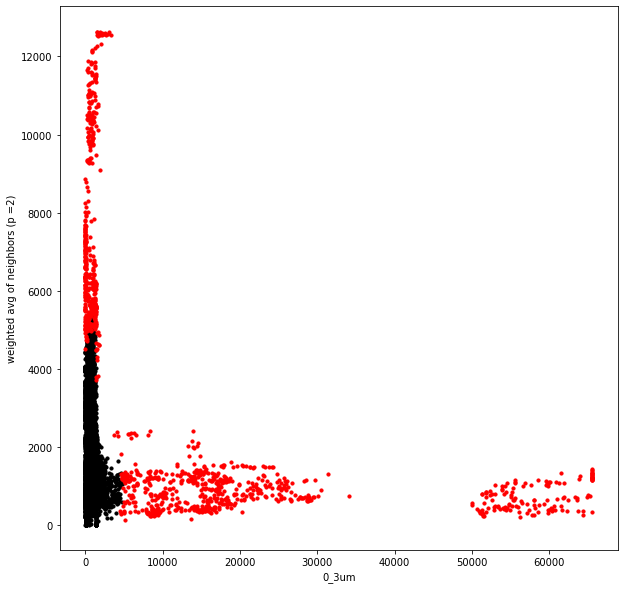

In [107]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))

outliers_fraction = 0.05
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

rc_fromi = lambda x: (x%6, x//6,)

print("inliers = black, outliers = red")

i = 0

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(df_3[['0_3um', 'neighbors_2']])

clf  = IsolationForest(n_estimators=100, contamination = outliers_fraction)
clf.fit(X)

scores_pred = clf.decision_function(X) * -1


y_pred = clf.predict(X)
n_inliers = np.sum(y_pred == 1)
n_outliers = np.sum(y_pred == -1)

assert n_inliers > n_outliers # shit test

inliers_measure = np.array(df_3['0_3um'][y_pred == 1]).reshape(-1,1)
inliers_neighbors = np.array(df_3['neighbors_2'][y_pred == 1]).reshape(-1,1)

outliers_measure = np.array(df_3['0_3um'][y_pred == -1]).reshape(-1,1)
outliers_neighbors = np.array(df_3['neighbors_2'][y_pred == -1]).reshape(-1,1)

threshold = np.percentile(scores_pred, 100 * outliers_fraction)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# fill countours
#ax[rc_fromi(i)].contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
#ax[rc_fromi(i)].contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

# draw countour lines
#ax[rc_fromi(i)].contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

ax.scatter(inliers_measure, inliers_neighbors, c='black',s=10)
ax.scatter(outliers_measure, outliers_neighbors, c='red',s=10)
ax.set_xlabel('0_3um')
ax.set_ylabel('weighted avg of neighbors (p =2)')

